В данной работе используется dataset, содержащий информацию о продажах домов в Сиэтле с мая 2014 по май 2015 https://www.kaggle.com/harlfoxem/housesalesprediction

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

import seaborn as sns 
sns.set_style('whitegrid') 

In [2]:
house=pd.read_csv('kc_house_data.csv', parse_dates = ['date'])

Посмотрим на данные

In [3]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(15)
memory usage: 3.5 MB


In [5]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Посмотрим на респределения признаков

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a117a54a8>,
      dtype=object)

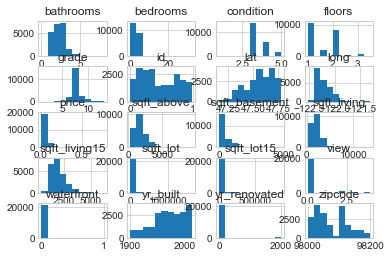

In [6]:
house.hist()

Посмотрим на зависимости разных признаков

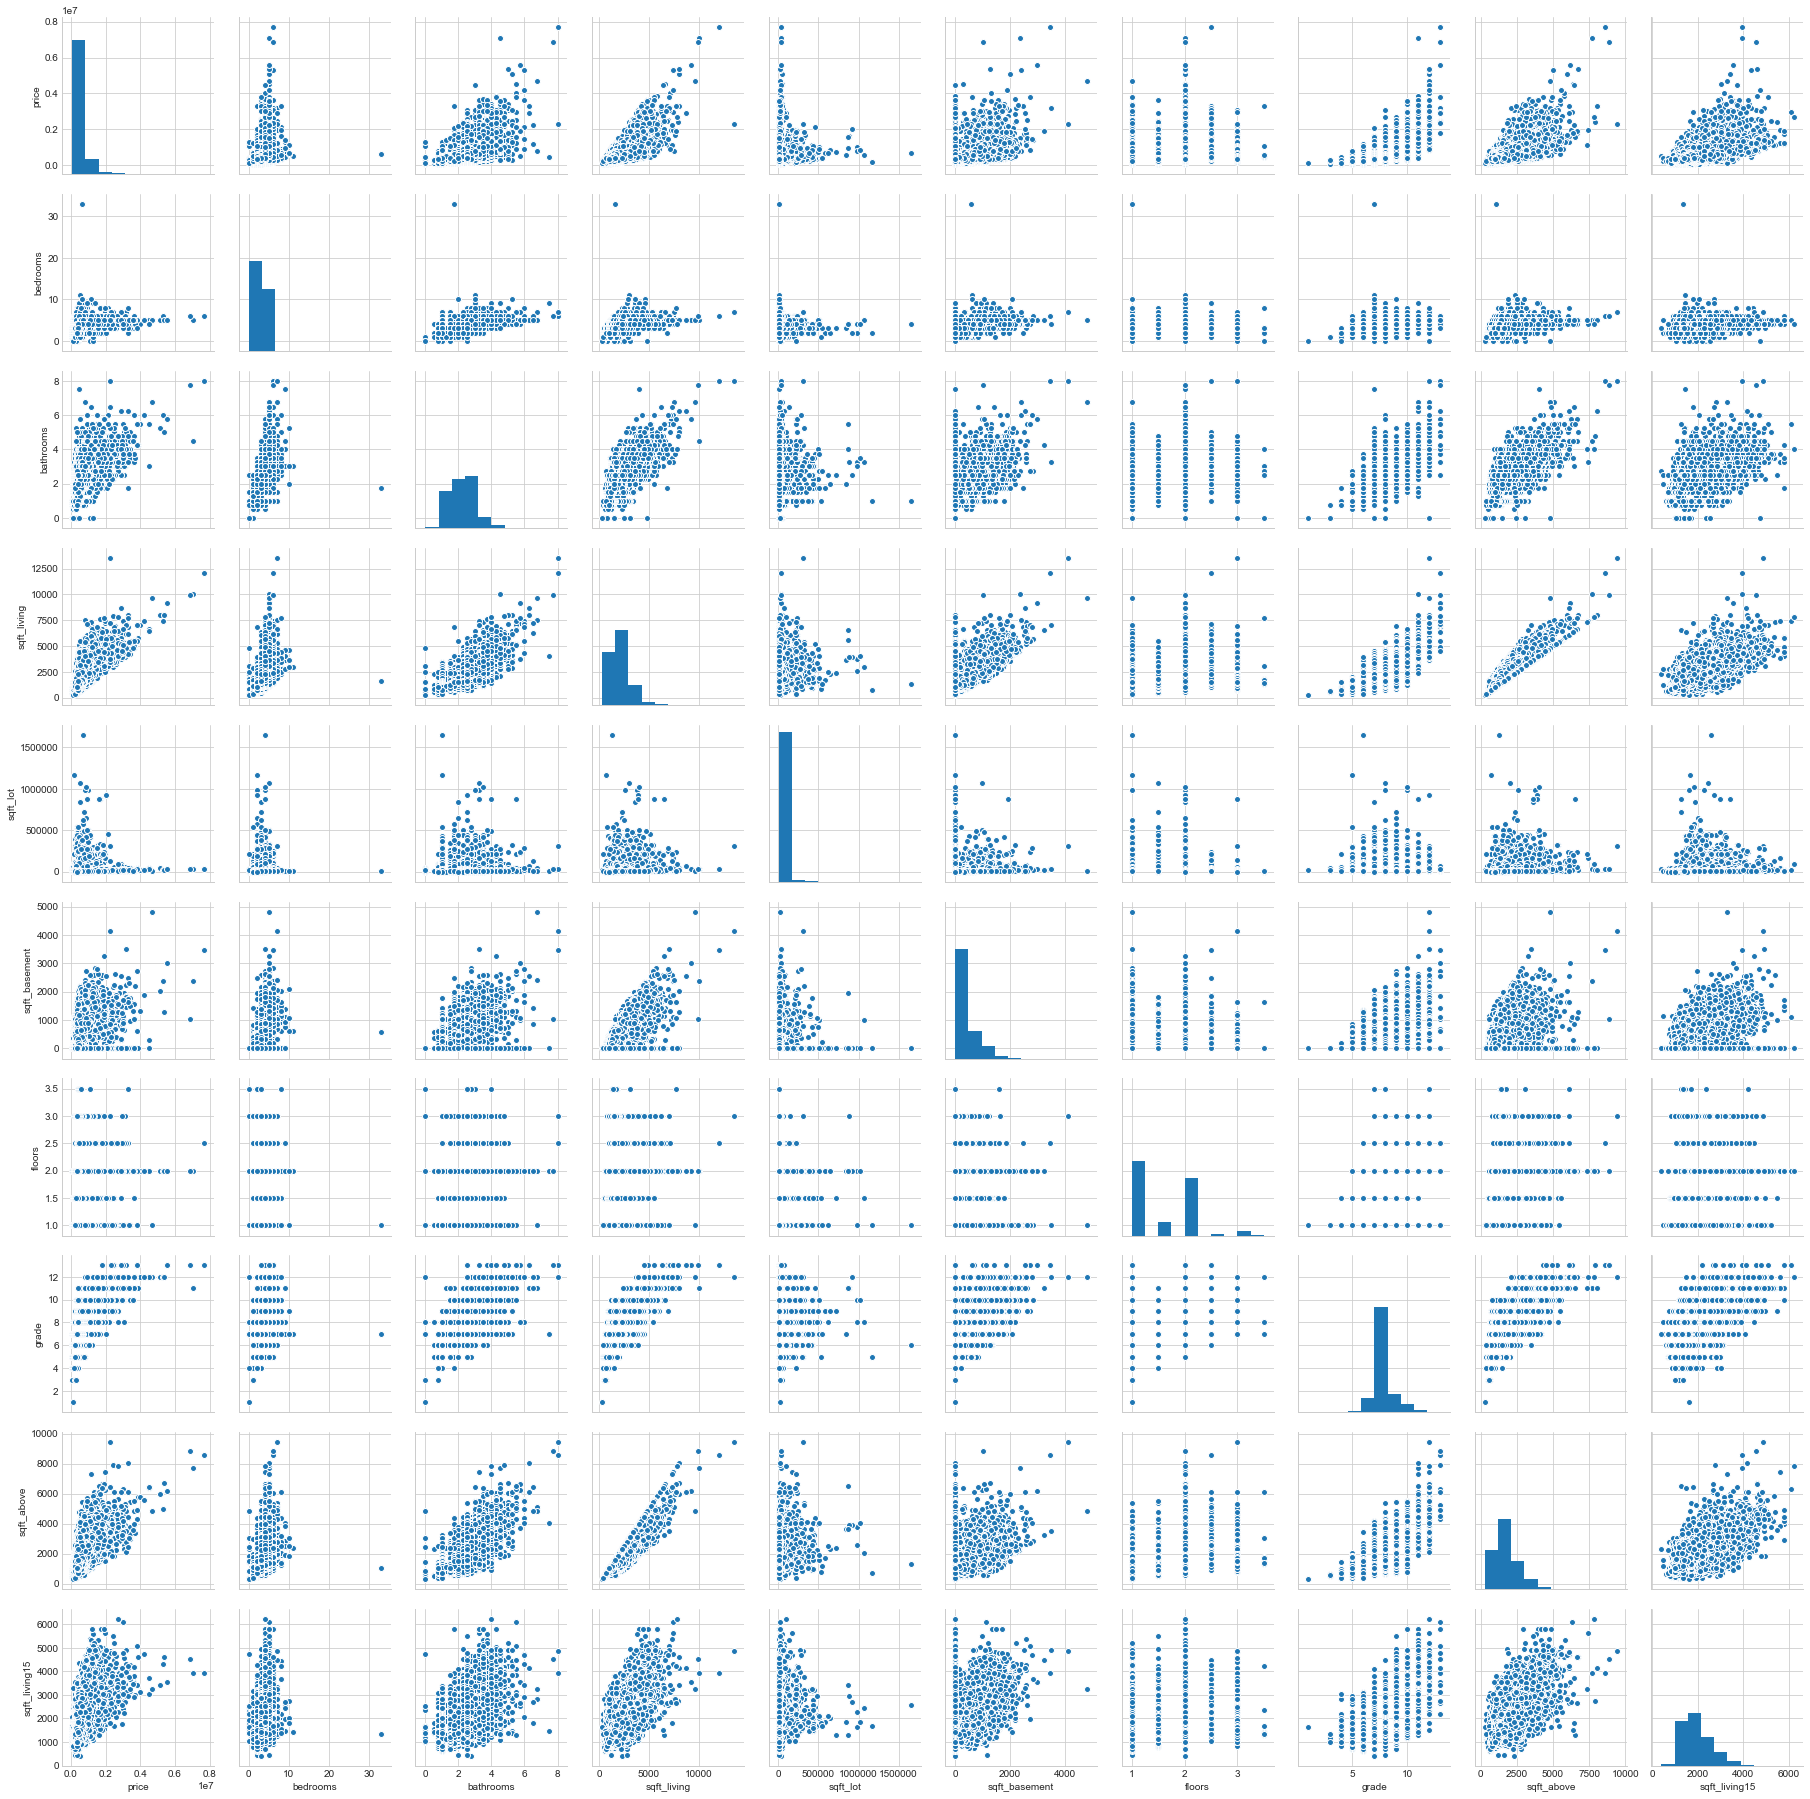

In [7]:
sns.pairplot(house, vars = ['price', 'bedrooms', 'bathrooms', 
                            'sqft_living','sqft_lot','sqft_basement','floors', 
                            'grade','sqft_above', 'sqft_living15'], kind='scatter')


Посмотрим на зависимости количества спален и количества ванных комнат

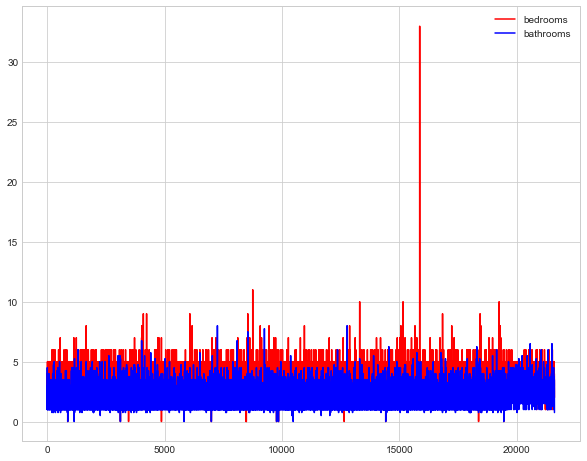

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
plt.plot(house['bedrooms'], 'r')
plt.plot(house['bathrooms'], 'b')
plt.legend()

Посмотрим на распределение цены

/Users/lera/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


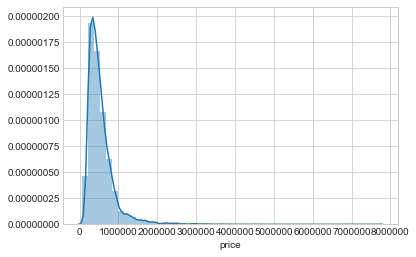

In [9]:
sns.distplot(house.price)

/Users/lera/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/lera/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


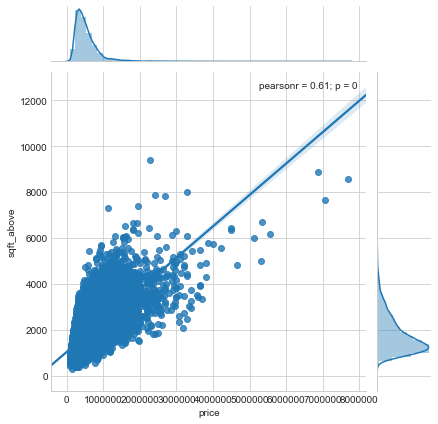

In [10]:
sns.jointplot(x='price', y='sqft_above', data=house, kind='reg')

Построим boxplot, где будет отражена цена и есть ли у дома вид на набережную.

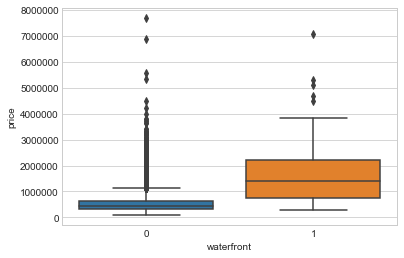

In [11]:
sns.boxplot(x='waterfront', y='price', data=house)

Попробуем получить некое подобие карты, используя координаты проданных домов. Получается малопонятно

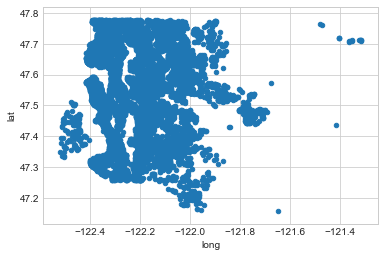

In [12]:
house.plot(kind='scatter', x='long', y='lat')

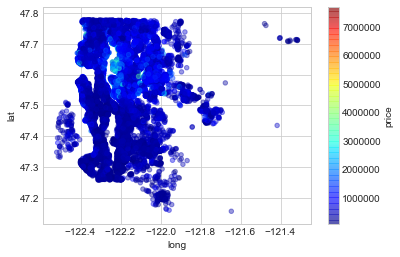

In [13]:
house.plot(kind="scatter", x="long", y="lat", alpha=0.4,
    c="price", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)


Посмотрим на более интересную визуализацию геоданных с использованием библиотеки folium. Подробнее о ней https://github.com/python-visualization/folium

In [14]:
#!pip install folium
import folium 
from folium import plugins

Посмотрим на расположение 100 самых дорогих домов на карте

In [15]:
house_100=house.sort_values('price', ascending=False).head(100)

In [16]:
house_heatmap = folium.Map(location = [house['lat'].mean(), house['long'].mean()], zoom_start = 9)
house_heatmap.add_child(plugins.HeatMap([[row["lat"], row["long"]] for name, row in house_100.iterrows()]))
house_heatmap.save('Heatmap.html')
house_heatmap

In [17]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

Посмотрим на распределение цены дома в зависимости от количества спален

In [18]:
house.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [19]:
traces = []
for bedrooms in [3, 4, 2, 5]:
    traces.append(
        go.Histogram(
            x=house[house.bedrooms == bedrooms].price,
            histnorm='probability', 
            name = bedrooms, 
            visible = (bedrooms == 3))
    )
    
layout = go.Layout(
    title='Price distribution',
    updatemenus=list([
        dict(
            x=-0.05,
            y=1,
            yanchor='top',
            buttons=list([
                dict(
                    args=['visible', [True] + [False]*3],
                    label='3 bedrooms',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False] + [True] + [False]*2],
                    label='4 bedrooms',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False]*2 + [True] + [False]],
                    label='2 bedrooms',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False]*3 + [True]],
                    label='5 bedrooms',
                    method='restyle'
                )
            ]),
        )
    ]),
)

fig = {'data': traces, 'layout': layout}
iplot(fig, show_link=False)

In [20]:
data = []

for bedrooms in [3, 4, 2, 5]:
    data.append(
        go.Box(y=house[house.bedrooms==bedrooms].price, 
               name=bedrooms)
    )
iplot(data, show_link = False)